In [78]:
cd D:\Kaggle\Titanic

D:\Kaggle\Titanic


In [79]:
pwd

'D:\\Kaggle\\Titanic'

In [338]:
#importing the required packages

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection, linear_model, metrics, svm, neighbors
%matplotlib inline

In [181]:
#importing the data in dataframe

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
gender = pd.read_csv('gender_submission.csv')

In [182]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [183]:
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [184]:
#Getting number of rows and columns

train.shape

(891, 12)

In [185]:
#listing the column names

train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [186]:
#data type of each variable

train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [187]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Cabin has almost 75% data that is missing. Dropping the cabin variable from further analysis

In [188]:
train.drop('Cabin', axis=1, inplace=True) #drop Cabin

In [189]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [190]:
train.Age.head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [191]:
mode1 = train['Age'].mode()

In [192]:
mode1

0    24.0
dtype: float64

In [193]:
mean1 = train['Age'].mean()
mean1

29.69911764705882

In [194]:
type(mean1)

float

In [195]:
std1 = train['Age'].std()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000202600276D8>]], dtype=object)

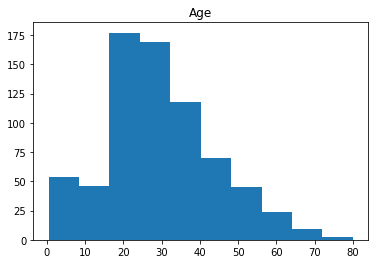

In [196]:
train.hist(column='Age', bins =10, grid=False)

In [197]:
train['Age'].fillna(round(train['Age'].mean(),2), inplace=True)

In [198]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [199]:
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True) # imputing Embarked with mode to fill two null values

In [200]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [203]:
train['Sex'].replace(['male', 'female'], [0,1], inplace=True) # dummy coding male=0 and female =1

In [204]:
train['Sex'].head()

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64

In [205]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(6), object(3)
memory usage: 76.6+ KB


In [206]:
train.Pclass.max()

3

In [207]:
feature_cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch','Fare']

In [208]:
# X = train.drop(['PassengerId', 'Survived','Name','Ticket','Embarked'], axis=1)

X = train[feature_cols]


In [209]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,3,1,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,3,0,35.0,0,0,8.0500


In [210]:
y = train['Survived']

In [254]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [370]:
type(y)

pandas.core.series.Series

### Calculating the Naive Rule / Null Accuracy

In [372]:
y.value_counts().head(1)/len(y)

# for binary classification below code can also be used
# max(y.mean(), 1-y.mean())

0    0.616162
Name: Survived, dtype: float64

In [211]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [212]:
test.drop('Cabin', axis=1, inplace=True) #drop Cabin

In [213]:
test.Age.mean()

30.272590361445783

In [214]:
test.Age.fillna(round(test.Age.mean(),2), inplace=True)

In [215]:
test['Fare'].fillna(test.Fare.mode()[0], inplace=True)

In [216]:
test.Sex.replace(['male', 'female'], [0,1], inplace=True)

In [217]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Embarked       418 non-null object
dtypes: float64(2), int64(5), object(3)
memory usage: 32.7+ KB


In [218]:
test['Sex'].head()

0    0
1    1
2    0
3    0
4    1
Name: Sex, dtype: int64

In [219]:
# X_test = test.drop(['PassengerId','Name','Ticket','Embarked'], axis=1)

X_pred = test[feature_cols]

In [220]:
X_pred.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,34.5,0,0,7.8292
1,3,1,47.0,1,0,7.0000
2,2,0,62.0,0,0,9.6875
3,3,0,27.0,0,0,8.6625
4,3,1,22.0,1,1,12.2875


In [227]:
X_pred.dtypes

Pclass      int64
Sex         int64
Age       float64
SibSp       int64
Parch       int64
Fare      float64
dtype: object

## Random Forest Implementation

In [236]:
ranforest = RandomForestClassifier(n_estimators=20, min_samples_split = 5)

In [237]:
ranforest.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

#### Testing model accuracy using training dataset

In [282]:
train_rf_pred = ranforest.predict(X)

In [284]:
accuracy_score(y, train_rf_pred)

0.90909090909090906

#### Creating train test split

In [312]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, random_state=42)

In [313]:
ranforest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [314]:
y_rf_pred = ranforest.predict(X_test)

In [315]:
print(accuracy_score(y_test, y_rf_pred))

0.807174887892


#### K-fold Cross Validation

In [316]:
model_selection.cross_val_score(ranforest, X, y, scoring='accuracy', cv=10).mean()

0.82392861196231981

#### Predict for test dataset

In [285]:
ranforest_pred = ranforest.predict(X_pred) # predicting Survived values for  original test dataset

In [286]:
ranforest_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

## Support Vector Machines (SVM)

In [334]:
svm_classify = svm.SVC() # keeping gamma and C as default

In [335]:
#predicting training dataset

svm_classify.fit(X,y)
train_svm_pred = svm_classify.predict(X)
metrics.accuracy_score(y, train_svm_pred)

0.89674523007856344

In [336]:
#svm_classify.fit(X[:-10],train.iloc[:-10,1]) using last 10 values for prediction

# Using train test split from row 235

svm_classify.fit(X_train, y_train)
y_svm_pred = svm_classify.predict(X_test)
metrics.accuracy_score(y_test, y_svm_pred).mean()

0.67713004484304928

In [337]:
# Using K-fold cross validation

model_selection.cross_val_score(svm_classify, X, y, scoring = 'accuracy', cv = 10).mean()

0.70053030303030295

In [326]:
# predict for test dataset
svm_pred = svm_classify.predict(X_pred)
svm_pred[:10]

array([0, 0, 1, 0, 0, 0, 1, 1, 0, 1], dtype=int64)

## Logistic Regression

In [158]:
logreg = linear_model.LogisticRegression()

In [330]:
#predicting training dataset

logreg.fit(X,y)
train_logreg_pred = logreg.predict(X)
metrics.accuracy_score(y, train_logreg_pred)

0.80022446689113358

In [331]:
# Using train test split from row 235

logreg.fit(X_train, y_train)
y_logreg_pred = logreg.predict(X_test)
metrics.accuracy_score(y_test, y_logreg_pred).mean()

0.79372197309417036

In [332]:
# Using K-fold cross validation

model_selection.cross_val_score(logreg, X, y, scoring = 'accuracy', cv = 10).mean()

0.79351577573487686

In [333]:
# predict for test dataset
logreg_pred = logreg.predict(X_pred)
svm_pred[:10]

array([0, 0, 1, 0, 0, 0, 1, 1, 0, 1], dtype=int64)

## K Nearest Neighbors

In [366]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 3)

In [367]:
#predicting training dataset

knn.fit(X,y)
train_knn_pred = knn.predict(X)
metrics.accuracy_score(y, train_knn_pred)

0.84175084175084181

In [368]:
# Using train test split from row 235

knn.fit(X_train, y_train)
y_knn_pred = knn.predict(X_test)
metrics.accuracy_score(y_test, y_knn_pred).mean()

0.69506726457399104

In [362]:
# Finding optimal value of K using K-fold cross validation

k_range = list(range(1,30))
k_scores = []

for k in k_range:
    knn = neighbors.KNeighborsClassifier(n_neighbors = k)
    scores = model_selection.cross_val_score(knn, X, y, scoring = 'accuracy', cv = 10).mean()
    k_scores.append(scores)

In [363]:
k_scores

[0.69265293383270909,
 0.70612331176937915,
 0.72188032005447733,
 0.70839660651458414,
 0.71064379752581996,
 0.70050590171376692,
 0.71291624106230844,
 0.6825524912041766,
 0.70169248666439676,
 0.69602315287708549,
 0.7039138576779026,
 0.69492424242424244,
 0.69491232550221305,
 0.70280246283055259,
 0.70506242197253433,
 0.70504937010554991,
 0.71403898535921018,
 0.70622318692543407,
 0.70278969469980723,
 0.70286488480308695,
 0.69948133015548752,
 0.70733429803654524,
 0.70734706616729093,
 0.70735926682555894,
 0.70170326864147092,
 0.69608500737714218,
 0.6983327658608558,
 0.70733458177278397,
 0.70062989445011925]

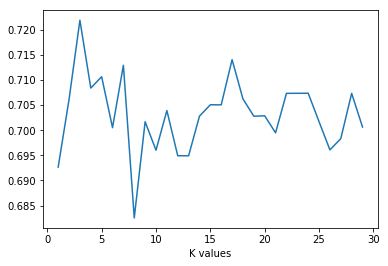

In [365]:
# plotting the value of K
plt.plot(k_range, k_scores)
plt.xlabel('K values')
plt.ylabel = ('Cross Validated Accuracy')

#### Plot indicates K=3 has the best accuracy of 0.72188

In [369]:
# predict for test dataset
knn_pred = knn.predict(X_pred)
knn_pred[:10]

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 1], dtype=int64)